In [1]:
import pandas as pd 
import numpy as np 

In [123]:
df = pd.read_csv('tmdb_movies_data.csv',index_col=0)
df = df[df['imdb_id'].notna()]


In [124]:
df['imdb_id'].isnull().values.any()

False

In [126]:
df.shape

(10856, 20)

In [128]:
index=list(df[(df['release_year']>=2010) & (df['budget']>0)]['imdb_id'])

In [129]:
df2=pd.read_csv('final data set.csv',index_col=0)

In [130]:
index2 = df2['Budget'].index[df2['Budget'].apply(np.isnan)]
imdb_list=list(df2.loc[index2]['IMDB ID'])

In [131]:
a=[]
for item in index:
    if item in imdb_list:
        a.append(item)


In [132]:
len(a)

240

In [133]:
for item in index:
    if item==np.nan:
        print(item)

In [147]:
replace=df2.set_index('IMDB ID').loc[a,'Budget'].index

In [152]:
df.set_index('imdb_id',inplace=True)

In [154]:
for item in replace:
    df2.loc[item,'Budget']=df.loc[item,'budget']

In [196]:
imdb_list=df2['Budget'].index[df2['Budget'].apply(np.isnan)]

In [197]:
len(imdb_list)

4057

In [160]:
df2.to_csv('final v2.csv')

In [124]:
df2=pd.read_csv('final v2.csv',index_col=0)

In [125]:
imdb_list=df2['Budget'].index[df2['Budget'].apply(np.isnan)]

In [126]:
df=pd.read_csv('movies_metadata.csv',low_memory=False,index_col=0)
df = df[df['imdb_id'].notna()]
df = df[df['budget'].notna()]
df.set_index('imdb_id',inplace=True)

In [127]:
df=df['budget']
df.dropna(inplace=True)

In [128]:
drop=[]
for i in range(len(df.index)):
    print('\r%i'%i,end='')
    try:
        df[i]=int(df[i])
    except:
        print(i)
        drop.append(i)

1972319723
2949129491
3557435574
45448

In [129]:
for item in drop:
    df.drop(df.index[item],inplace=True)

In [90]:
val = df.values
for i,item in enumerate(val):
    val[i] = int(item)


In [130]:
df=df[df.values>0]

In [131]:
df

imdb_id
tt0114709    30000000
tt0113497    65000000
tt0114885    16000000
tt0113277    60000000
tt0114319    58000000
               ...   
tt3761706     2000000
tt0417949     2000000
tt0933361      800000
tt1718881     2000000
tt1110037     5000000
Name: budget, Length: 8888, dtype: object

In [132]:
df.drop_duplicates(inplace=True)

In [133]:
a=[]
for item in imdb_list:
    if item in list(df.index):
        a.append(item) 

In [134]:
for item in a:
    df2.loc[item,'Budget'] = df[item]

In [135]:
len(imdb_list)

4057

In [136]:
len(df2['Budget'].index[df2['Budget'].apply(np.isnan)])

3977

In [137]:
4057-3977

80

In [138]:
len(a)

80

In [140]:
df2.to_csv("final v3.csv")

In [3]:
df=pd.read_csv('final v3.csv',index_col=0)

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer()
nonless=pd.DataFrame(imp_mean.fit_transform(df),index=df.index , columns=df.columns)

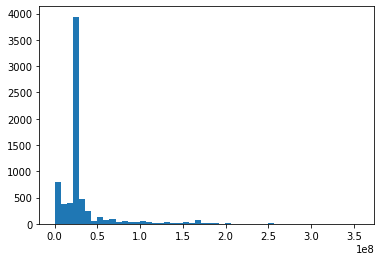

In [14]:
import matplotlib.pyplot as plt 
plt.hist(nonless['Budget'],bins=50)
plt.show()

In [20]:
from sklearn.impute import KNNImputer

imp = KNNImputer(n_neighbors=5,weights='distance')
nonless=pd.DataFrame(imp.fit_transform(df),index=df.index , columns=df.columns)

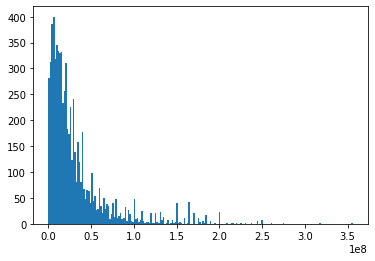

In [21]:
plt.hist(nonless['Budget'],bins=200)
plt.show()